# Logistic回归

Logistic回归（Logit回归）是统计学、机器学习中非常常用的解决分类问题的统计方法。

我们首先介绍二分类问题。

二分类问题指被解释变量为0/1两个取值的情况。比如，我们可能需要判断一封电子邮件是否为垃圾邮件（垃圾邮件=1，否则=0），或者我们需要预测哪些个体会参与到某个项目中（参与=1）、是否会上大学（上大学=1）。

令$\left(y_{i},x_{i}'\right)',i=1,...,N,x_{i}\in\mathbb{R}^{K}$，而其中$y_{i}$为**二元变量**（**binary variable**），即$y_{i}\in\left\{ 0,1\right\} $，那么其条件期望：$$\mathbb{E}\left(y_{i}|x_{i}\right)=1\cdot P\left(y_{i}|x_{i}\right)+0\cdot\left(1-P\left(y_{i}|x_{i}\right)\right)=P\left(y_{i}|x_{i}\right)$$即条件期望为给定$x_{i}，y_{i}=1$的条件概率。然而如果我们使用线性回归，线性函数$x_{i}'\beta$不能够保证一定在$\left(0,1\right)$区间范围以内，因而此时使用线性回归拟合上述条件期望就不再合适。

为了避免以上问题，我们可以将概率$P\left(y_{i}|x_{i}\right)$建模为一个概率分布，一个常用的假设是：$$P\left(y_{i}=1|x_{i},\beta\right)=F\left(x_{i}'\beta\right)=\frac{e^{x_{i}'\beta}}{1+e^{x_{i}'\beta}}$$由于函数$F\left(x\right)=\frac{e^{x}}{1+e^{x}}$为一个Logistic分布的分布函数，因而其函数值一定是单调的且在$\left(0,1\right)$之间的。以上模型我们通常称为**逻辑斯蒂回归**（**Logistic regression**）。

我们将$y_{i}=1$的概率与$y_{i}=0$的概率的比值成为**几率**（**odds**），那么根据以上设定，该模型的几率为：$$odds=\frac{P\left(y_{i}=1|x_{i},\beta\right)}{P\left(y_{i}=0|x_{i},\beta\right)}=\frac{\frac{e^{x_{i}'\beta}}{1+e^{x_{i}'\beta}}}{1-\frac{e^{x_{i}'\beta}}{1+e^{x_{i}'\beta}}}=e^{x_{i}'\beta}$$而**对数几率**（**log odds**，也称为**logit**）为：$$logit=\ln\left(odds\right)=x_{i}'\beta$$因而以上模型被称为**对数几率回归**（**Logit regression**）。

为了估计上述模型中的$\beta$，我们可以使用条件极大似然法。以上模型的条件密度函数为：$$f\left(y_{i}|x_{i},\beta\right)=\left[\frac{e^{x_{i}'\beta}}{1+e^{x_{i}'\beta}}\right]^{1\left\{ y_{i}=1\right\} }\left[\frac{1}{1+e^{x_{i}'\beta}}\right]^{1\left\{ y_{i}=0\right\} }$$因而极大似然函数为：$$L\left(\beta|y,x\right)=\sum_{i=1}^{N}\left[y_{i}\ln\left(\frac{e^{x_{i}'\beta}}{1+e^{x_{i}'\beta}}\right)+\left(1-y_{i}\right)\ln\left(\frac{1}{1+e^{x_{i}'\beta}}\right)\right]$$最大化以上似然函数，就可以得到$\beta$的一致估计$\hat{\beta}$。进而得到$p\left(x_{i}\right)=P\left(y_{i}=1|x_{i}\right)$，即给定$x_{i}，y_{i}=1$的概率的估计:$$\hat{p}_{i}\overset{\Delta}{=}\widehat{P\left(y_{i}=1|x_{i}\right)}=F\left(x_{i}'\hat{\beta}\right)$$

In [1]:
import pandas as pd
raw_data=pd.read_csv("csv/soep.csv")
raw_data.head()

,persnr,year,employment,chld6,chld16,age,income,husworkhour,husemployment,region,edu,husedu
0,9401,2008,[1] Employed 1,0,0,48,50682,1923,1,0,13.0,12.0
1,9401,2009,[1] Employed 1,0,0,49,45880,2078,1,0,13.0,12.0
2,9401,2010,[1] Employed 1,0,0,50,48690,2078,1,0,13.0,12.0
3,9401,2011,[1] Employed 1,0,0,51,52832,2494,1,0,13.0,12.0
4,9401,2012,[1] Employed 1,0,0,52,55790,2078,1,0,13.0,12.0


In [2]:
import numpy as np

data=raw_data.set_index(['persnr','year'])
data['log_income']=np.log(data['income'])
data['age2']=np.power(data['age'],2)
data=data.drop('income',axis=1)
region_dummy=pd.get_dummies(data['region'])
data=pd.concat([data,region_dummy], axis=1)
data=data.drop(['region','0'],axis=1)
data['employment']=data['employment']==data['employment'][0]
data.head()

employment  chld6  chld16  age  husworkhour  husemployment   edu  \
persnr year                                                                     
9401   2008        True      0       0   48         1923              1  13.0   
       2009        True      0       0   49         2078              1  13.0   
       2010        True      0       0   50         2078              1  13.0   
       2011        True      0       0   51         2494              1  13.0   
       2012        True      0       0   52         2078              1  13.0   

             husedu  log_income  age2  [1] West-Germany   1  
persnr year                                                  
9401   2008    12.0   10.833326  2304                     0  
       2009    12.0   10.733785  2401                     0  
       2010    12.0   10.793229  2500                     0  
       2011    12.0   10.874872  2601                     0  
       2012    12.0   10.929350  2704                     0

In [3]:
y=data['employment']
X=data.drop('employment',axis=1)
y.mean()

0.8260999254287845

In [4]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression(penalty='none', max_iter=1000)
LR.fit(X,y)  ## 训练模型
LR.coef_

array([[-1.45746963e+00, -2.94076199e-01,  1.35183884e-01,
         1.37731379e-04,  1.33442903e-01,  1.49565273e-01,
        -5.65095671e-02, -1.55677934e-01, -1.90723156e-03,
         5.44253933e-01]])

值得注意的是我们特地加了一个选项「penalty='none'」，即没有惩罚项，做普通的Logistic回归。默认情况会使用L2正则化，也可以选择L1正则化，这里需要注意。

模型训练好之后，当然可以计算预测概率：

In [5]:
LR.predict_proba(X)

array([[0.11624083, 0.88375917],
       [0.11758016, 0.88241984],
       [0.12426345, 0.87573655],
       ...,
       [0.11300107, 0.88699893],
       [0.10906905, 0.89093095],
       [0.10805793, 0.89194207]])

注意以上的概率有两列，分别是按照可能的结果排序的（False,True）的概率值，我们希望得到True的概率，所以：

In [6]:
data['prob']=LR.predict_proba(X)[:,1]
data

employment  chld6  chld16  age  husworkhour  husemployment  \
persnr  year                                                               
9401    2008        True      0       0   48         1923              1   
        2009        True      0       0   49         2078              1   
        2010        True      0       0   50         2078              1   
        2011        True      0       0   51         2494              1   
        2012        True      0       0   52         2078              1   
...                  ...    ...     ...  ...          ...            ...   
8270802 2008        True      0       0   23         2078              1   
        2009        True      0       0   24         2078              1   
        2010        True      0       0   25         2078              1   
        2011        True      0       0   26         2078              1   
        2012        True      0       0   27         2078              1   

               edu  husedu  log_income  age2  [1] West-Germany   1      prob  
persnr  year                                                                  
9401    2008  13.0    12.0   10.833326  2304                     0  0.883759  
        2009  13.0    12.0   10.733785  2401                     0  0.882420  
        2010  13.0    12.0   10.793229  2500                     0  0.875737  
        2011  13.0    12.0   10.874872  2601                     0  0.874330  
        2012  13.0    12.0   10.929350  2704                     0  0.859695  
...            ...     ...         ...   ...                   ...       ...  
8270802 2008  11.5    11.5   10.264861   529                     0  0.875230  
        2009  11.5    11.5   10.079539   576                     0  0.883130  
        2010  11.5    11.5   10.103240   625                     0  0.886999  
        2011  11.5    11.5   10.090880   676                     0  0.890931  
        2012  11.5    11.5   10.242813   729                     0  0.891942  

[6705 rows x 12 columns]

In [7]:
data['pred']=LR.predict(X)
data

employment  chld6  chld16  age  husworkhour  husemployment  \
persnr  year                                                               
9401    2008        True      0       0   48         1923              1   
        2009        True      0       0   49         2078              1   
        2010        True      0       0   50         2078              1   
        2011        True      0       0   51         2494              1   
        2012        True      0       0   52         2078              1   
...                  ...    ...     ...  ...          ...            ...   
8270802 2008        True      0       0   23         2078              1   
        2009        True      0       0   24         2078              1   
        2010        True      0       0   25         2078              1   
        2011        True      0       0   26         2078              1   
        2012        True      0       0   27         2078              1   

               edu  husedu  log_income  age2  [1] West-Germany   1      prob  \
persnr  year                                                                   
9401    2008  13.0    12.0   10.833326  2304                     0  0.883759   
        2009  13.0    12.0   10.733785  2401                     0  0.882420   
        2010  13.0    12.0   10.793229  2500                     0  0.875737   
        2011  13.0    12.0   10.874872  2601                     0  0.874330   
        2012  13.0    12.0   10.929350  2704                     0  0.859695   
...            ...     ...         ...   ...                   ...       ...   
8270802 2008  11.5    11.5   10.264861   529                     0  0.875230   
        2009  11.5    11.5   10.079539   576                     0  0.883130   
        2010  11.5    11.5   10.103240   625                     0  0.886999   
        2011  11.5    11.5   10.090880   676                     0  0.890931   
        2012  11.5    11.5   10.242813   729                     0  0.891942   

              pred  
persnr  year        
9401    2008  True  
        2009  True  
        2010  True  
        2011  True  
        2012  True  
...            ...  
8270802 2008  True  
        2009  True  
        2010  True  
        2011  True  
        2012  True  

[6705 rows x 13 columns]

# Logistic回归的模型评价

## 常用的模型评价指标

对于Logit回归：类比于线性回归中的$R^{2}$，McFadden(1974)建议使用Pseudo $R^{2}$:$$R^{2}	=1-\frac{L\left(\hat{\beta}|y,x\right)}{L_{0}}
	=1-\frac{\sum_{i=1}^{N}\left[1\left\{ y_{i}=1\right\} \ln\left(\hat{p}_{i}\right)+1\left\{ y_{i}=0\right\} \ln\left(1-\hat{p}_{i}\right)\right]}{N\left[\bar{y}\ln\bar{y}+\left(1-\bar{y}\right)\ln\left(1-\bar{y}\right)\right]}$$

此外，为了进行预测分类，我们可以选定一个临界值$c$，并令预测值$\hat{y}_{i}=1\left\{ \hat{p}_{i}>c\right\}$ ，之后将样本分为四类：

* 真正（True Positive， TP）：$y_{i}=1,\hat{y}_{i}=1$;
* 假正（False Positive， FP）：$y_{i}=0,\hat{y}_{i}=1$;
* 真反（True Negative， TN）：$y_{i}=0,\hat{y}_{i}=0$;
* 假反（False Negative， FN）：$y_{i}=1,\hat{y}_{i}=0$。

使用以上四个分类分别定义：

* 查准率（precision），即所有预测为正的样本中，正确的比例：$$Precision=\frac{TP}{TP+FP}$$
* 查全率（或者召回率，recall），即所有正的样本中，正确的比例：$$Recall=\frac{TP}{TP+FN}$$
* 精度（accuracy），即所有样本中预测正确的比例：$$Accuracy=\frac{TP+TN}{TP+FP+TN+FN}$$
* F1度量，即查准率和查全率的调和平均：$$F1=\frac{2\times Precision\times Recall}{Precision+Recall}=\frac{1}{\frac{1}{2}\left(\frac{1}{Precision}+\frac{1}{Recall}\right)}$$

查准率和查全率之间通常存在着权衡：

* 比如，如果我们希望提高查准率，需减少预测为正的比例，需要较大的$c$，从而降低查全率。
* 使得查准率等于查全率的点称为平衡点（break-event point, BEP）。

In [8]:
TP=np.sum(data['employment'] & data['pred'])
TN=np.sum((~data['employment'] & (~data['pred'])))
FP=np.sum((~data['employment'] & (data['pred'])))
FN=np.sum((data['employment']) & (~data['pred']))

print("TP=",TP)
print("TN=",TN)
print("FP=",FP)
print("FN=",FN)
print("查全率=敏感性=",TP/(TP+FN))
print("查准率=",TP/(TP+FP))
print("特异性=",TN/(TN+FP))

TP= 5513
TN= 35
FP= 1131
FN= 26
查全率=敏感性= 0.9953060119155082
查准率= 0.8297712221553282
特异性= 0.030017152658662092


此外，我们还可以使用ROC曲线：

对于任意的临界值$c$，我们都可以定义：

* 敏感性（sensitivity）：观察到的正的样本中，预测正确的比例，即$$Sensitivity=Recall=\frac{TP}{TP+FN}$$
* 特异性（specificity）：观察到的反的样本中，预测正确的比例，即$$Specificity=\frac{TN}{TN+FP}$$

**受试者工作特征曲线**（receiver operating characteristic curve， **ROC curve**）：即当$c\in\left[0,1\right]$时，以$1-Specificity$作为横坐标，以$Sensitivity$作为纵坐标所画出来的图。

当$c=0$时，所有的$\hat{y}_{i}=1$，因而$Sensitivity=1$，$1-Specificity=1$；当$c=1$时，所有的$\hat{y}_{i}=0$，因而$Sensitivity=0$，$1-Specificity=0$，因而ROC曲线从$\left(0,0\right)$出发，到$\left(1,1\right)$终止。一个理想的模型应该是$1-Specificity$很小，同时$Sensitivity$很大，因而ROC曲线越向$\left(0,1\right)$弯曲，表明模型的预测能力越好。

为此，一个度量模型预测能力的指标即计算**ROC曲线的线下面积**（**area under ROC curve, AUC**），AUC越大，则模型的预测能力越强。

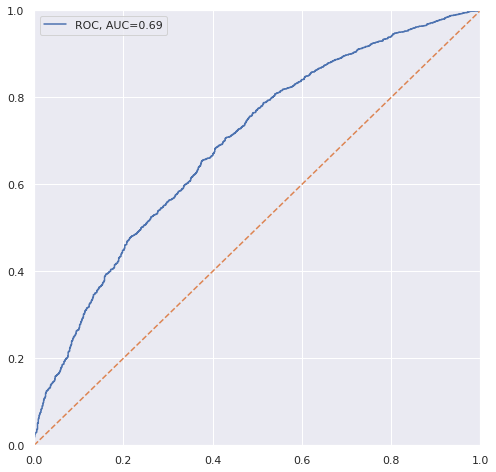

In [9]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(data['employment'], data['prob'])
roc_auc = auc(fpr, tpr)
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.plot(fpr,tpr,label='ROC, AUC=%.2f' % roc_auc)
plt.legend(loc='upper left', frameon=True)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

## 样本外预测指标

同样的，在预测问题中，我们应该更加关注样本外预测能力，我们可以通过划分训练集、测试集的方式计算模型样本外预测能力，或者

In [10]:
X['employment']=y
## 产生一个随机顺序，并排序，从而顺序是随机的
X['random_order']=np.random.random(X.shape[0])
X=X.sort_values(['random_order'])
X=X.drop('random_order', axis=1)
X

,,chld6,chld16,age,husworkhour,husemployment,edu,husedu,log_income,age2,[1] West-Germany 1,employment
persnr,year,,,,,,,,,,,
5138602,2009,0,0,48,1819,1,12.0,12.0,10.273118,2304,1,True
8204902,2011,0,1,52,2598,1,18.0,18.0,11.188344,2704,0,True
798302,2011,1,0,40,2338,1,11.5,10.5,10.297689,1600,0,True
2772802,2008,0,1,37,2078,1,10.5,10.5,10.802754,1369,0,True
2951801,2008,0,1,38,2078,1,11.0,10.5,10.232791,1444,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8064201,2012,0,0,54,2078,1,18.0,18.0,10.983579,2916,0,True
2871702,2011,1,2,39,2494,1,12.0,18.0,11.639426,1521,0,False
5002601,2010,0,0,51,1083,1,11.5,16.0,8.903679,2601,1,True


In [11]:
from sklearn.model_selection import KFold
## 区分训练集和测试集
kf = KFold(n_splits=10)
## 使用训练集回归
CV_prob=np.array([])
for train, test in kf.split(X):
    X_train=X.iloc[train,:]
    X_test=X.iloc[test,:]
    # 先使用训练集训练模型
    logit=LogisticRegression(penalty='none', max_iter=1000).fit(X_train.drop('employment',axis=1),X_train['employment'])
    # 接下来在验证集上进行预测，得到预测概率
    pre_prob=logit.predict_proba(X_test.drop('employment',axis=1))[:,1]
    CV_prob=np.concatenate([CV_prob,pre_prob])
CV_prob

array([0.92240869, 0.87648012, 0.70570025, ..., 0.89391762, 0.92633446,
       0.8702839 ])

以$c=0.6$进行预测：

In [12]:
CV_pred=CV_prob>=0.6
CV_pred

array([ True,  True,  True, ...,  True,  True,  True])

计算指标：

In [13]:
TP=np.sum(X['employment'] & CV_pred)
TN=np.sum((~X['employment'] & (~CV_pred)))
FP=np.sum((~X['employment'] & (CV_pred)))
FN=np.sum((X['employment']) & (~CV_pred))

print("TP=",TP)
print("TN=",TN)
print("FP=",FP)
print("FN=",FN)
print("查全率=敏感性=",TP/(TP+FN))
print("查准率=",TP/(TP+FP))
print("特异性=",TN/(TN+FP))

TP= 5348
TN= 142
FP= 1024
FN= 191
查全率=敏感性= 0.9655172413793104
查准率= 0.8392969240426867
特异性= 0.12178387650085763


以及ROC曲线：

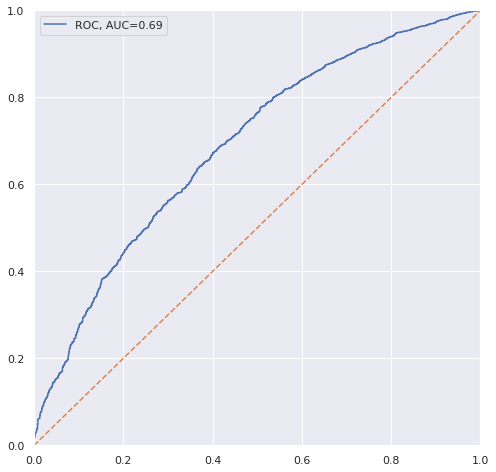

In [14]:
fpr, tpr, threshold = roc_curve(X['employment'], CV_prob)
roc_auc = auc(fpr, tpr)
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.plot(fpr,tpr,label='ROC, AUC=%.2f' % roc_auc)
plt.legend(loc='upper left', frameon=True)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

注意到我们的数据实际上是一个面板数据，上面的Cross-Validation过程中，我们把每年每个个人看成是一个独立的个人进行抽取的，这种方法并不是非常好。一个更好的方法是按照个体进行划分，我们可以使用unstack()方法先将面板数据变换成「宽」的格式，然后使用KFold进行划分，进行回归时再使用stack()方法将其变回「长」的格式，如此就可以保证在Cross-Validation时不存在不同分组中存在相同个体的不同年份的数据了。

In [15]:
X=X.sort_index()
X=X.unstack()
X['random_order']=np.random.random(X.shape[0])
X=X.sort_values(['random_order'])
X=X.drop('random_order', axis=1)
X

chld6                     chld16                      ...  \
year     2008 2009 2010 2011 2012   2008 2009 2010 2011 2012  ...   
persnr                                                        ...   
7023104     1    1    1    1    1      0    0    0    1    1  ...   
3256402     0    0    0    0    0      1    1    1    1    1  ...   
5505702     0    0    0    0    0      2    2    2    2    2  ...   
3133901     0    0    0    0    0      1    1    0    0    0  ...   
7250902     0    0    0    0    0      3    3    3    3    3  ...   
...       ...  ...  ...  ...  ...    ...  ...  ...  ...  ...  ...   
2873002     0    0    0    0    0      2    1    1    1    1  ...   
2553202     0    0    0    0    0      1    1    0    0    0  ...   
951502      0    0    0    0    0      2    2    2    2    2  ...   
8064201     0    0    0    0    0      1    0    0    0    0  ...   
2859402     0    0    0    0    0      0    0    0    0    0  ...   

        [1] West-Germany   1                     employment                \
year                    2008 2009 2010 2011 2012       2008   2009   2010   
persnr                                                                      
7023104                    0    0    0    0    0      False  False  False   
3256402                    0    0    0    0    0       True   True   True   
5505702                    1    1    1    1    1       True   True   True   
3133901                    0    0    0    0    0       True   True   True   
7250902                    0    0    0    0    0       True   True   True   
...                      ...  ...  ...  ...  ...        ...    ...    ...   
2873002                    0    0    0    0    0       True   True   True   
2553202                    0    0    0    0    0       True   True   True   
951502                     0    0    0    0    0       True   True   True   
8064201                    0    0    0    0    0       True   True   True   
2859402                    0    0    0    0    0       True   True   True   

                      
year      2011  2012  
persnr                
7023104  False  True  
3256402   True  True  
5505702   True  True  
3133901   True  True  
7250902   True  True  
...        ...   ...  
2873002   True  True  
2553202   True  True  
951502    True  True  
8064201   True  True  
2859402   True  True  

[1341 rows x 55 columns]

In [16]:
from sklearn.model_selection import KFold
## 区分训练集和测试集
kf = KFold(n_splits=10)
## 使用训练集回归
CV_prob=np.array([])
for train, test in kf.split(X):
    X_train=X.iloc[train,:].stack()
    X_test=X.iloc[test,:].stack()
    # 先使用训练集训练模型
    logit=LogisticRegression(penalty='none', max_iter=1000).fit(X_train.drop('employment',axis=1),X_train['employment'])
    # 接下来在验证集上进行预测，得到预测概率
    pre_prob=logit.predict_proba(X_test.drop('employment',axis=1))[:,1]
    CV_prob=np.concatenate([CV_prob,pre_prob])
CV_prob

array([0.65318467, 0.65464766, 0.64748088, ..., 0.91826264, 0.91529884,
       0.91128355])

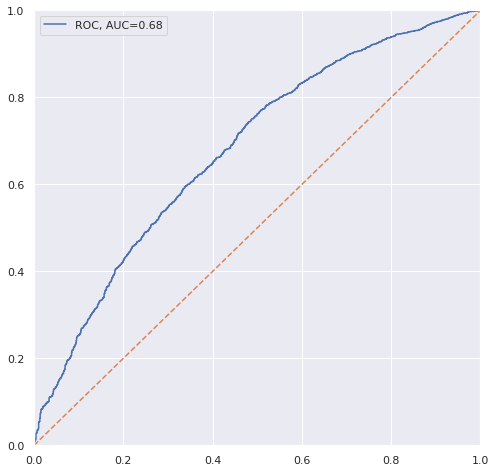

In [17]:
CV_pred=CV_prob>=0.5
X=X.stack()
fpr, tpr, threshold = roc_curve(X['employment'], CV_prob)
roc_auc = auc(fpr, tpr)
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.plot(fpr,tpr,label='ROC, AUC=%.2f' % roc_auc)
plt.legend(loc='upper left', frameon=True)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

# 多元Logistic

以上我们解决了预测目标为二分的情况（0/1），Logistic回归可以轻易的推广到多个选择的情况，即多元Logistic（multinomial Logistic）。

如果可供选择的选项有$J+1$种：$y\in\left\{ 0,1,2,...,J\right\}$ ，选取$y=0$为基准选项

给定特征$x$，假定选择的概率为：$$P\left(y=j|x\right)	=\frac{e^{x'\beta_{j}}}{1+\sum_{j=1}^{J}e^{x'\beta_{j}}},j=1,....,J$$ $$
P\left(y=0|x\right)	=\frac{1}{1+\sum_{j=1}^{J}e^{x'\beta_{j}}}$$

此时，有$J$个$\beta_{j}$需要估计，我们同样可以使用极大似然估计对参数进行估计。

可以发现，以上介绍的Logistic回归实际上是$J=1$的一个特例，即一个简单的二元Logistic回归。

在Scikit-Learn中，使用多元Logistic回归的方法与二元的Logistic是一样的，只需要提供的$y$中有多于两个选项，就会自动帮我们做多元Logistic。

比如如下代码中我们使用教育情况、年龄、性别等特征预测每个人的雇主性质：

In [18]:
import pandas as pd
raw_data=pd.read_csv('csv/cfps_adult.csv')
raw_data=raw_data.loc[:,['cfps_birthy', 'cfps_gender', 'te4', 'qg2']]
raw_data.head()

,cfps_birthy,cfps_gender,te4,qg2
0,1969,0,-8,77
1,1966,1,-8,3
2,1981,1,-8,4
3,1990,0,-8,4
4,1988,0,-8,2


In [19]:
# 生成年龄
raw_data['age']=2014-raw_data['cfps_birthy']
raw_data['age2']=raw_data['age']**2
raw_data=raw_data.drop('cfps_birthy',axis=1)
# 产生教育的虚拟变量
edu_dummies=pd.get_dummies(raw_data['te4'],prefix='edu')
raw_data=pd.concat([raw_data, edu_dummies],axis=1)
raw_data=raw_data.drop('te4',axis=1)
# 只保留政府部门、事业单位、国有企业和私营企业
data=raw_data[(raw_data['qg2']>0) & (raw_data['qg2']<=4)]
data.head()

,cfps_gender,qg2,age,age2,edu_-8,edu_-1,edu_1,edu_2,edu_3,edu_4,edu_5,edu_6,edu_7
1,1,3,48,2304,1,0,0,0,0,0,0,0,0
2,1,4,33,1089,1,0,0,0,0,0,0,0,0
3,0,4,24,576,1,0,0,0,0,0,0,0,0
4,0,2,26,676,1,0,0,0,0,0,0,0,0
5,0,4,27,729,1,0,0,0,0,0,0,0,0


接下来可以直接使用如上的LogisticRegression：

In [20]:
LR=LogisticRegression(penalty='none', max_iter=1000).fit(data.drop('qg2',axis=1),data['qg2'])  ## 训练模型
LR.coef_

array([[ 1.49776872e-01, -5.33855275e-02,  7.88610903e-04,
         1.30275915e-01, -6.43804872e-03, -6.68100605e-02,
        -2.07943618e-01, -2.95264670e-01, -1.07346777e-01,
         6.44116472e-02,  8.95966319e-02,  1.12448550e-02],
       [-7.79524246e-01,  1.19658705e-02, -5.21916192e-05,
         1.09379554e-01, -1.24759023e-02, -8.20614736e-02,
        -2.68719387e-01, -4.24025538e-01, -1.81518970e-01,
         1.29425472e-01,  2.01487701e-01,  2.31317142e-02],
       [ 4.92230042e-01,  3.05170298e-02, -3.96058522e-04,
        -3.94499392e-01, -2.33897365e-03, -8.33227678e-02,
        -1.44205793e-01, -2.77239129e-01,  6.91563478e-02,
         1.96107220e-01,  1.07533418e-01,  1.92432719e-02],
       [ 1.37517333e-01,  1.09026271e-02, -3.40360762e-04,
         1.54843923e-01,  2.12529246e-02,  2.32194302e-01,
         6.20868798e-01,  9.96529338e-01,  2.19709400e-01,
        -3.89944340e-01, -3.98617752e-01, -5.36198411e-02]])

以及预测概率，注意因为现在有4个选项，从而预测的概率有四列：

In [21]:
prob=LR.predict_proba(data.drop('qg2',axis=1))
prob

array([[0.06800824, 0.07763255, 0.18380207, 0.67055714],
       [0.04939189, 0.05875922, 0.15994847, 0.73190041],
       [0.04861567, 0.12522074, 0.09646408, 0.72969951],
       ...,
       [0.04919905, 0.05455581, 0.15031774, 0.7459274 ],
       [0.04717162, 0.12997421, 0.10043096, 0.72242321],
       [0.04914801, 0.05784686, 0.15806447, 0.73494065]])

可以使用如上概率计算各种指标，比如画ROC曲线：

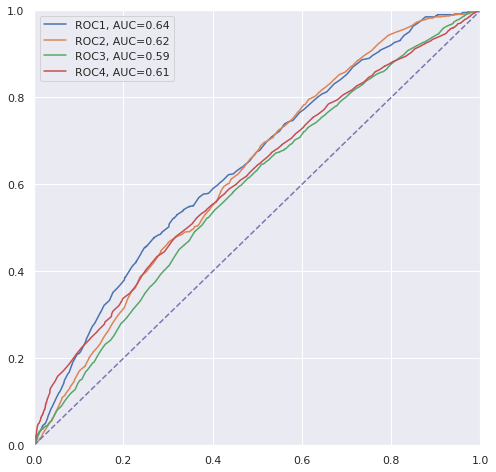

In [22]:
fpr1, tpr1, threshold1 = roc_curve(data['qg2']==1, prob[:,0])
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(data['qg2']==2, prob[:,1])
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, threshold3 = roc_curve(data['qg2']==3, prob[:,2])
roc_auc3 = auc(fpr3, tpr3)
fpr4, tpr4, threshold4 = roc_curve(data['qg2']==4, prob[:,3])
roc_auc4 = auc(fpr4, tpr4)
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.plot(fpr1,tpr1,label='ROC1, AUC=%.2f' % roc_auc1)
plt.plot(fpr2,tpr2,label='ROC2, AUC=%.2f' % roc_auc2)
plt.plot(fpr3,tpr3,label='ROC3, AUC=%.2f' % roc_auc3)
plt.plot(fpr4,tpr4,label='ROC4, AUC=%.2f' % roc_auc4)
plt.legend(loc='upper left', frameon=True)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()